In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics import r2_score
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
os.chdir("C:\\Users\\Sandeep\\Practice\\Linear_regression\\code\\src")
import modelfit_v1 as mdl 
pd.set_option('display.max_rows',None)
from IPython.display import display
os.chdir("C:\\Users\\Sandeep\\Practice\\Linear_regression\\code")
import var_trans as var_transformation

C:\Users\Sandeep\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
target = 'SalePrice'

In [3]:
data = pd.read_csv("C:\\Users\\Sandeep\\Practice\\Linear_regression\\output_2.csv")


In [4]:
import pickle
with open('C:\\Users\\Sandeep\\Practice\\Linear_regression\\impute_mv_cont.dictionary', 'rb') as f:
    impute_mv_cont = pickle.load(f)
with open('C:\\Users\\Sandeep\\Practice\\Linear_regression\\impute_mv_cat.dictionary', 'rb') as f:
    impute_mv_cat = pickle.load(f)

In [5]:
var_trans = [var for var in data.columns if '_' in var]

In [6]:
data[var_trans].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LotFrontage__T      1460 non-null   float64
 1   LotArea__T          1460 non-null   float64
 2   OverallQual__T      1460 non-null   float64
 3   YearBuilt__T        1460 non-null   float64
 4   YearRemodAdd__T     1460 non-null   float64
 5   MasVnrArea__T       1460 non-null   float64
 6   BsmtFinSF1__T       1460 non-null   float64
 7   TotalBsmtSF__T      1460 non-null   float64
 8   1stFlrSF__T         1460 non-null   float64
 9   2ndFlrSF__T         1460 non-null   float64
 10  GrLivArea__T        1460 non-null   float64
 11  FullBath_0          1460 non-null   int64  
 12  FullBath_2          1460 non-null   int64  
 13  FullBath_3          1460 non-null   int64  
 14  HalfBath_0          1460 non-null   int64  
 15  HalfBath_2          1460 non-null   int64  
 16  TotRms

                     0                 1                    2           3
0               Model:               OLS      Adj. R-squared:       0.863
1  Dependent Variable:         SalePrice                 AIC:  34249.2265
2                Date:  2025-04-14 19:39                 BIC:  34598.1152
3    No. Observations:              1460      Log-Likelihood:     -17059.
4            Df Model:                65         F-statistic:       142.6
5        Df Residuals:              1394  Prob (F-statistic):        0.00
6           R-squared:             0.869               Scale:  8.6336e+08


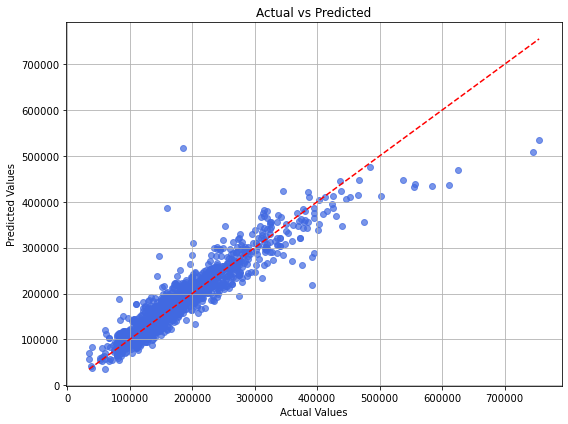

In [7]:
model_perf, summary_df,model = mdl.modelfit(data,var_trans, target)


In [8]:
summary_df

,Variable,Coefficient,Std.Err.,t,p_value,[0.025,0.975],StdDev,Raw_Impact,Contribution,VIF
0,const,-129069.160233,180325.948672,-0.715755,4.742626e-01,-482808.660986,224670.340519,0.000000e+00,-0.000000,0.000000,1.64
1,LotFrontage__T,0.110975,0.439521,0.252491,8.006989e-01,-0.751218,0.973168,2.241157e+03,248.712205,0.389535,1.83
2,LotArea__T,0.000116,0.000019,6.242308,5.710369e-10,0.000080,0.000152,5.593349e+07,6489.536713,10.163967,3.99
3,OverallQual__T,11896.387248,1122.187057,10.601073,2.629035e-25,9695.029694,14097.744802,1.369444e+00,16291.437598,25.515786,9.21
4,YearBuilt__T,38.352519,84.211518,0.455431,6.488703e-01,-126.842454,203.547493,2.772119e+01,1063.177434,1.665157,2.57
5,YearRemodAdd__T,0.000018,0.000005,3.592369,3.390810e-04,0.000008,0.000028,2.426948e+08,4425.930232,6.931929,2.76
6,MasVnrArea__T,20.858989,7.601584,2.744032,6.146793e-03,5.947212,35.770766,1.679930e+02,3504.164333,5.488252,3.05
7,BsmtFinSF1__T,18.026609,3.129792,5.759682,1.035404e-08,11.886998,24.166220,4.290492e+02,7734.302215,12.113529,6.90
8,TotalBsmtSF__T,21.694511,5.428903,3.996113,6.775754e-05,11.044810,32.344211,3.723352e+02,8077.630541,12.651253,15.23
9,1stFlrSF__T,9.041818,8.251961,1.095718,2.733917e-01,-7.145782,25.229419,3.638027e+02,3289.437944,5.151945,12.45


In [9]:
pd.set_option('display.max_rows',None)
top_var = summary_df[(summary_df['p_value']<=0.05) & (summary_df['Contribution']>=10)& (summary_df['VIF']<=10)]

In [10]:
var_trans_top = top_var['Variable'].to_list()

                     0                 1                    2           3
0               Model:               OLS      Adj. R-squared:       0.820
1  Dependent Variable:         SalePrice                 AIC:  34595.9111
2                Date:  2025-04-14 19:39                 BIC:  34664.6316
3    No. Observations:              1460      Log-Likelihood:     -17285.
4            Df Model:                12         F-statistic:       556.0
5        Df Residuals:              1447  Prob (F-statistic):        0.00
6           R-squared:             0.822               Scale:  1.1341e+09


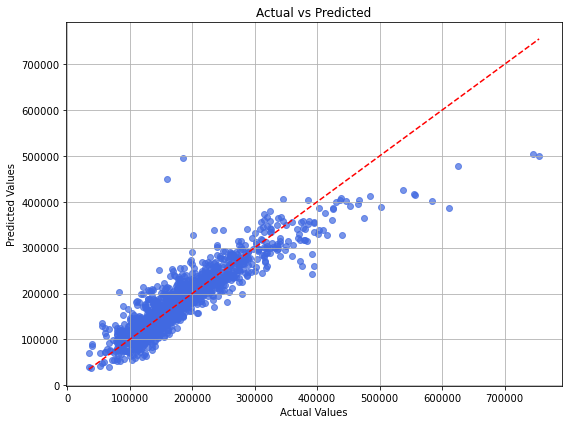

In [11]:
model_perf, summary_df,model = mdl.modelfit(data,var_trans_top, target)

In [12]:
summary_df

,Variable,Coefficient,Std.Err.,t,p_value,[0.025,0.975],StdDev,Raw_Impact,Contribution,VIF
0,const,-11195.711479,7997.707830,-1.399865,1.617681e-01,-26884.053343,4492.630385,0.000000e+00,-0.000000,0.000000,1.37
1,LotArea__T,0.000189,0.000018,10.235931,8.657592e-24,0.000153,0.000225,5.593349e+07,10576.458681,26.520251,2.69
2,OverallQual__T,22063.927373,1055.206176,20.909589,4.793389e-85,19994.029899,24133.824847,1.369444e+00,30215.315665,75.764278,1.15
3,BsmtFinSF1__T,35.817786,2.201614,16.268879,8.785493e-55,31.499090,40.136481,4.290492e+02,15367.592371,38.533920,2.01
4,GrLivArea__T,43.303127,2.525870,17.143845,4.013343e-60,38.348368,48.257886,4.951489e+02,21441.496638,53.764109,1.18
5,FullBath_3,55343.288800,6453.232161,8.576057,2.485206e-17,42684.597783,68001.979817,1.486842e-01,8228.673799,20.633229,2.49
6,ExterQual_TA,-17523.332177,2864.149899,-6.118162,1.216213e-09,-23141.662293,-11905.002061,4.854169e-01,-8506.121876,21.328924,2.90
7,BsmtQual_Gd,-19900.906747,3036.979971,-6.552861,7.826836e-11,-25858.261158,-13943.552336,4.942495e-01,-9836.012548,24.663598,3.13
8,BsmtQual_TA,-23646.254144,3139.969128,-7.530728,8.839207e-14,-29805.632576,-17486.875712,4.970828e-01,-11754.145290,29.473276,3.87
9,KitchenQual_Gd,-19218.301008,3535.045367,-5.436508,6.369084e-08,-26152.662878,-12283.939138,4.903435e-01,-9423.569584,23.629406,4.55


In [13]:
data[var_trans_top].corr().style.background_gradient(cmap='coolwarm')

,LotArea__T,OverallQual__T,BsmtFinSF1__T,GrLivArea__T,FullBath_3,ExterQual_TA,BsmtQual_Gd,BsmtQual_TA,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Detchd
LotArea__T,1.000000,0.264254,0.217614,0.456939,0.170745,-0.127029,0.027016,-0.099107,0.032971,-0.109808,0.230652,-0.256579
OverallQual__T,0.264254,1.000000,0.224470,0.593196,0.183673,-0.655059,0.348003,-0.502997,0.410315,-0.561898,0.357284,-0.340401
BsmtFinSF1__T,0.217614,0.224470,1.000000,0.137803,0.029561,-0.122047,0.066311,-0.118913,0.032918,-0.104835,0.287390,-0.218637
GrLivArea__T,0.456939,0.593196,0.137803,1.000000,0.340222,-0.395422,0.166753,-0.287518,0.244573,-0.359461,0.144087,-0.238668
FullBath_3,0.170745,0.183673,0.029561,0.340222,1.000000,-0.071016,-0.055667,-0.034027,0.035299,-0.097816,-0.062583,-0.070446
ExterQual_TA,-0.127029,-0.655059,-0.122047,-0.395422,-0.071016,1.000000,-0.421378,0.543294,-0.557605,0.671600,-0.281532,0.316116
BsmtQual_Gd,0.027016,0.348003,0.066311,0.166753,-0.055667,-0.421378,1.000000,-0.766391,0.449540,-0.357990,0.264814,-0.291510
BsmtQual_TA,-0.099107,-0.502997,-0.118913,-0.287518,-0.034027,0.543294,-0.766391,1.000000,-0.392243,0.447369,-0.260476,0.312203
KitchenQual_Gd,0.032971,0.410315,0.032918,0.244573,0.035299,-0.557605,0.449540,-0.392243,1.000000,-0.824457,0.252881,-0.206827
KitchenQual_TA,-0.109808,-0.561898,-0.104835,-0.359461,-0.097816,0.671600,-0.357990,0.447369,-0.824457,1.000000,-0.228855,0.248841


In [14]:
#### Validate the model on test data
test_data = pd.read_csv("C:\\Users\\Sandeep\\Practice\\Linear_regression\\test.csv")

In [15]:
test_data.shape

(1459, 80)

In [16]:
test_data  = var_transformation.vartransformation(test_data,impute_mv_cont,impute_mv_cat)

In [17]:
X = test_data[var_trans_top]
X_const = sm.add_constant(X)

In [18]:
y_pred_test = model.predict(X_const)